In [19]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [20]:
# Import data
income = pd.read_csv("../data/raw/income_SA2_full.csv")
population = pd.read_csv("../data/raw/population.csv")

In [21]:
# Sample integrity analysis
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 44 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   462 non-null    int64  
 1   SA2          462 non-null    int64  
 2   SA2 NAME     462 non-null    object 
 3   2011-12      462 non-null    object 
 4   2012-13      462 non-null    object 
 5   2013-14      462 non-null    object 
 6   2014-15      462 non-null    object 
 7   2015-16      462 non-null    object 
 8   2016-17      462 non-null    object 
 9   2017-18      462 non-null    object 
 10  2018-19      462 non-null    object 
 11  2011-12.1    462 non-null    object 
 12  2012-13.1    462 non-null    object 
 13  2013-14.1    462 non-null    object 
 14  2014-15.1    462 non-null    object 
 15  2015-16.1    462 non-null    object 
 16  2016-17.1    462 non-null    object 
 17  2017-18.1    462 non-null    object 
 18  2018-19.1    462 non-null    object 
 19  2011-12.

In [22]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                462 non-null    int64  
 1   S/T code                  462 non-null    int64  
 2   S/T name                  462 non-null    object 
 3   GCCSA code                462 non-null    object 
 4   GCCSA name                462 non-null    object 
 5   SA4 code                  462 non-null    int64  
 6   SA4 name                  462 non-null    object 
 7   SA3 code                  462 non-null    int64  
 8   SA3 name                  462 non-null    object 
 9   SA2 code                  462 non-null    int64  
 10  SA2 name                  462 non-null    object 
 11  ERP 2020                  462 non-null    int64  
 12  ERP 2021                  462 non-null    int64  
 13  ERP Change Amount         462 non-null    int64  
 14  ERP Change

In [23]:
# Select the features that have to be analyzed by income
income1 = income.iloc[:,1:11]
income1

,SA2,SA2 NAME,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
0,201011001,Alfredton,5098,5372,5760,6225,6718,7124,7558,7989
1,201011002,Ballarat,7139,7158,7151,7289,7400,7470,7585,7595
2,201011003,Ballarat - North,12073,12063,12261,12503,12516,12889,13356,13598
3,201011004,Ballarat - South,11096,11168,11372,11347,11529,11905,12294,12722
4,201011005,Buninyong,3828,3878,3897,3966,4001,4118,4195,4249
...,...,...,...,...,...,...,...,...,...,...
457,217031476,Otway,2110,2177,2176,2225,2212,2315,2297,2360
458,217041477,Moyne - East,3871,3790,3858,3890,3833,3879,3954,4081
459,217041478,Moyne - West,5401,5429,5435,5650,5602,5759,5765,5852
460,217041479,Warrnambool - North,11528,11577,11780,12185,12346,12694,12950,13157


In [24]:
# Select the features that the population will analyze
population1 = population[['SA2 code','SA2 name','ERP 2020','ERP 2021','Area km2','density 2021 persons/km2']]
population1

,SA2 code,SA2 name,ERP 2020,ERP 2021,Area km2,density 2021 persons/km2
0,201011001,Alfredton,15030,16263,52.7,308.5
1,201011002,Ballarat,12097,11931,12.4,963.8
2,201011003,Ballarat - North,24606,24720,92.4,267.7
3,201011004,Ballarat - South,25639,25543,32.9,777.5
4,201011005,Buninyong,7721,7668,51.6,148.6
...,...,...,...,...,...,...
457,217031476,Otway,3653,3661,1505.9,2.4
458,217041477,Moyne - East,6737,6815,3275.8,2.1
459,217041478,Moyne - West,9857,9977,2037.8,4.9
460,217041479,Warrnambool - North,22487,22586,62.4,361.8


In [25]:
# Np is replaced by 0
population1 = population1.replace("np","0")
income1 = income1.replace("np","0")

In [26]:
# The string format is converted to a number format
population1.iloc[:,2:6] = population1.iloc[:,2:6].astype('int64')
income1.iloc[:,2:10] = income1.iloc[:,2:10].astype('int64')

In [27]:
income1.iloc[:,2:10].describe()

,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,6561.199134,6653.357143,6814.738095,7050.417749,7222.889610,7518.872294,7799.896104,8038.859307
std,3445.384809,3503.081957,3590.763173,3735.337689,3868.255295,4085.025175,4276.538405,4461.888621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3839.500000,3879.500000,4035.500000,4160.250000,4246.250000,4339.750000,4494.500000,4581.250000
50%,6181.500000,6254.000000,6368.000000,6658.000000,6769.000000,7019.500000,7276.000000,7463.500000
75%,9212.500000,9302.000000,9627.750000,9936.000000,10099.500000,10432.000000,10813.000000,11061.250000
max,17612.000000,18408.000000,19158.000000,20133.000000,20622.000000,24075.000000,26083.000000,27182.000000


In [28]:
population1.iloc[:,2:6].describe()

,ERP 2020,ERP 2021,Area km2,density 2021 persons/km2
count,462.000000,462.000000,462.000000,462.000000
mean,14488.870130,14391.917749,491.952381,1601.025974
std,8240.869467,8231.000778,1645.771065,1997.192933
min,0.000000,0.000000,1.000000,0.000000
25%,8414.500000,8269.250000,6.000000,64.250000
50%,13747.000000,13632.500000,14.000000,1047.000000
75%,19891.250000,19654.000000,128.750000,2505.500000
max,55462.000000,60489.000000,21569.000000,19920.000000


In [29]:
income1['2019'] = 0
income1['2020'] = 0
income1['2021'] = 0
income1['2022'] = 0
income1['2023'] = 0
income1['2024'] = 0

In [30]:
# The income data is split into two data sets
income11 = income1[ (income1.iloc[:,2]==0)  | (income1.iloc[:,3] ==0 ) |  ( income1.iloc[:,4]==0 ) | (income1.iloc[:,5]==0 ) |
                     (income1.iloc[:,6]==0) | (income1.iloc[:,7] ==0 )  |  ( income1.iloc[:,8]==0  )| (income1.iloc[:,9]==0 )]

income12 = income1[ (income1.iloc[:,2]>0)  & (income1.iloc[:,3]>0 ) &  ( income1.iloc[:,4]>0 ) & (income1.iloc[:,5]>0 ) & 
                     (income1.iloc[:,6]>0) &  (income1.iloc[:,7] >0 )  &   ( income1.iloc[:,8]>0  )&  (income1.iloc[:,9]>0 )]

In [31]:
# Calculate the overall average annual growth rate of income
rate1 = income1.iloc[:,2:10].describe().iloc[1,1]/income1.iloc[:,2:10].describe().iloc[1,0]
rate2 = income1.iloc[:,2:10].describe().iloc[1,2]/income1.iloc[:,2:10].describe().iloc[1,1]
rate3 = income1.iloc[:,2:10].describe().iloc[1,3]/income1.iloc[:,2:10].describe().iloc[1,2]
rate4 = income1.iloc[:,2:10].describe().iloc[1,4]/income1.iloc[:,2:10].describe().iloc[1,3]
rate5 = income1.iloc[:,2:10].describe().iloc[1,5]/income1.iloc[:,2:10].describe().iloc[1,4]
rate6 = income1.iloc[:,2:10].describe().iloc[1,6]/income1.iloc[:,2:10].describe().iloc[1,5]
rate7 = income1.iloc[:,2:10].describe().iloc[1,7]/income1.iloc[:,2:10].describe().iloc[1,6]

rate = (rate1+ rate2+ rate3+rate4 +rate5 +rate6 +rate7)/7
rate

1.0294769824950232

In [32]:
# Data set prediction with NP
for i in range( len(income11)):
    income11.iloc[i,10] = income11.iloc[i,9]*rate
    income11.iloc[i,11] = income11.iloc[i,10]*rate
    income11.iloc[i,12] = income11.iloc[i,11]*rate
    income11.iloc[i,13] = income11.iloc[i,12]*rate
    income11.iloc[i,14] = income11.iloc[i,13]*rate
    income11.iloc[i,15] = income11.iloc[i,14]*rate 

In [33]:
income12['r'] = 0

In [34]:
for i in range( len(income12)):
    income12.iloc[i,16] = (income12.iloc[i,9]/income12.iloc[i,8]+ income12.iloc[i,8]/income12.iloc[i,7]
                            +income12.iloc[i,7]/income12.iloc[i,6] +income12.iloc[i,6]/income12.iloc[i,5] 
                            + income12.iloc[i,5]/income12.iloc[i,4]+income12.iloc[i,4]/income12.iloc[i,3]
                            + income12.iloc[i,3]/income12.iloc[i,2] )/7

In [35]:
# Data set prediction without NP
for i in range( len(income12)):
    income12.iloc[i,10] = income12.iloc[i,9]* income12.iloc[i,16]
    income12.iloc[i,11] = income12.iloc[i,10]* income12.iloc[i,16]
    income12.iloc[i,12] = income12.iloc[i,11]* income12.iloc[i,16]
    income12.iloc[i,13] = income12.iloc[i,12]* income12.iloc[i,16]
    income12.iloc[i,14] = income12.iloc[i,13]* income12.iloc[i,16]
    income12.iloc[i,15] = income12.iloc[i,14]* income12.iloc[i,16]   

In [36]:
income12

,SA2,SA2 NAME,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019,2020,2021,2022,2023,2024,r
0,201011001,Alfredton,5098,5372,5760,6225,6718,7124,7558,7989,8518.876168,9083.896754,9686.392737,10328.849699,11013.918081,11744.424115,1.066326
1,201011002,Ballarat,7139,7158,7151,7289,7400,7470,7585,7595,7662.685231,7730.973660,7799.870662,7869.381662,7939.512131,8010.267590,1.008912
2,201011003,Ballarat - North,12073,12063,12261,12503,12516,12889,13356,13598,13832.111248,14070.253094,14312.494931,14558.907348,14809.562148,15064.532369,1.017217
3,201011004,Ballarat - South,11096,11168,11372,11347,11529,11905,12294,12722,12974.075319,13231.145291,13493.308880,13760.667011,14033.322611,14311.380642,1.019814
4,201011005,Buninyong,3828,3878,3897,3966,4001,4118,4195,4249,4312.920486,4377.802569,4443.660716,4510.509610,4578.364156,4647.239482,1.015044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,217031476,Otway,2110,2177,2176,2225,2212,2315,2297,2360,2398.496923,2437.621818,2477.384928,2517.796664,2558.867606,2600.608508,1.016312
458,217041477,Moyne - East,3871,3790,3858,3890,3833,3879,3954,4081,4112.548415,4144.340718,4176.378792,4208.664539,4241.199873,4273.986723,1.007731
459,217041478,Moyne - West,5401,5429,5435,5650,5602,5759,5765,5852,5920.143081,5989.079649,6058.818942,6129.370307,6200.743202,6272.947192,1.011644
460,217041479,Warrnambool - North,11528,11577,11780,12185,12346,12694,12950,13157,13408.331388,13664.463830,13925.489038,14191.500476,14462.593393,14738.864859,1.019102


In [37]:
# Merge two pieces of data
income12 = income12.drop(['r'],axis=1)
income =  pd.concat([income11 ,income12],axis=0)

In [38]:
income

,SA2,SA2 NAME,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019,2020,2021,2022,2023,2024
79,205021080,Alps - East,0,0,0,0,0,4,3,3,3.088431,3.179469,3.273190,3.369673,3.469001,3.571257
82,205021083,Lake King,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
91,205031092,Wilsons Promontory,0,0,0,0,0,8,10,9,9.265293,9.538406,9.819569,10.109020,10.407004,10.713771
126,206041127,West Melbourne,0,0,0,0,0,6,8,7,7.206339,7.418760,7.637443,7.862571,8.094336,8.332933
193,208031192,Moorabbin Airport,0,0,0,0,0,7,8,8,8.235816,8.478583,8.728506,8.985796,9.250670,9.523352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,217031476,Otway,2110,2177,2176,2225,2212,2315,2297,2360,2398.496923,2437.621818,2477.384928,2517.796664,2558.867606,2600.608508
458,217041477,Moyne - East,3871,3790,3858,3890,3833,3879,3954,4081,4112.548415,4144.340718,4176.378792,4208.664539,4241.199873,4273.986723
459,217041478,Moyne - West,5401,5429,5435,5650,5602,5759,5765,5852,5920.143081,5989.079649,6058.818942,6129.370307,6200.743202,6272.947192
460,217041479,Warrnambool - North,11528,11577,11780,12185,12346,12694,12950,13157,13408.331388,13664.463830,13925.489038,14191.500476,14462.593393,14738.864859


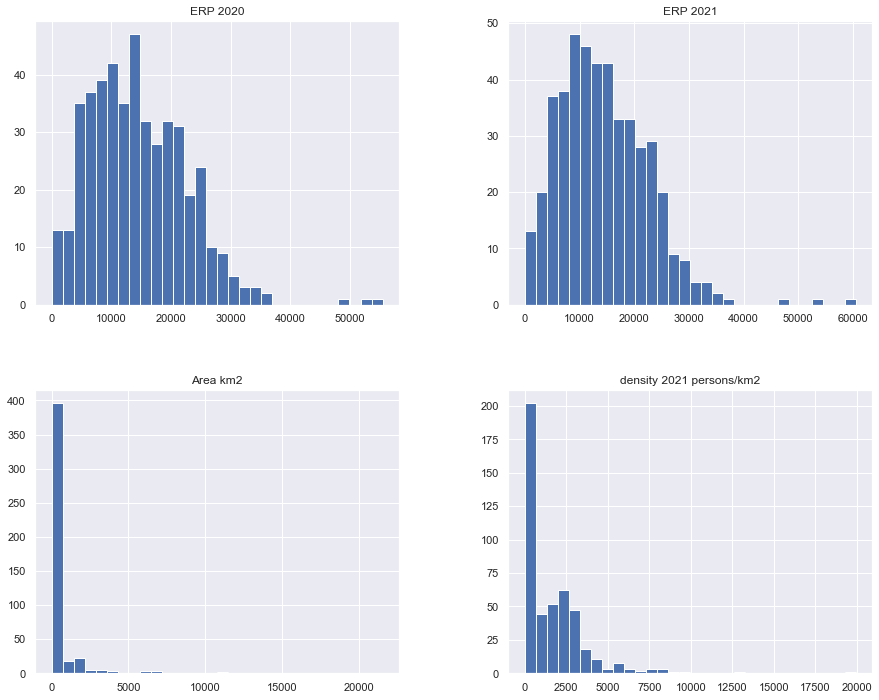

In [39]:
# Histogram of the population
import matplotlib.pyplot as plt
population1.iloc[:,2:6].hist(bins=30,figsize=(15,12))
plt.show()

<AxesSubplot:ylabel='density 2021 persons/km2'>

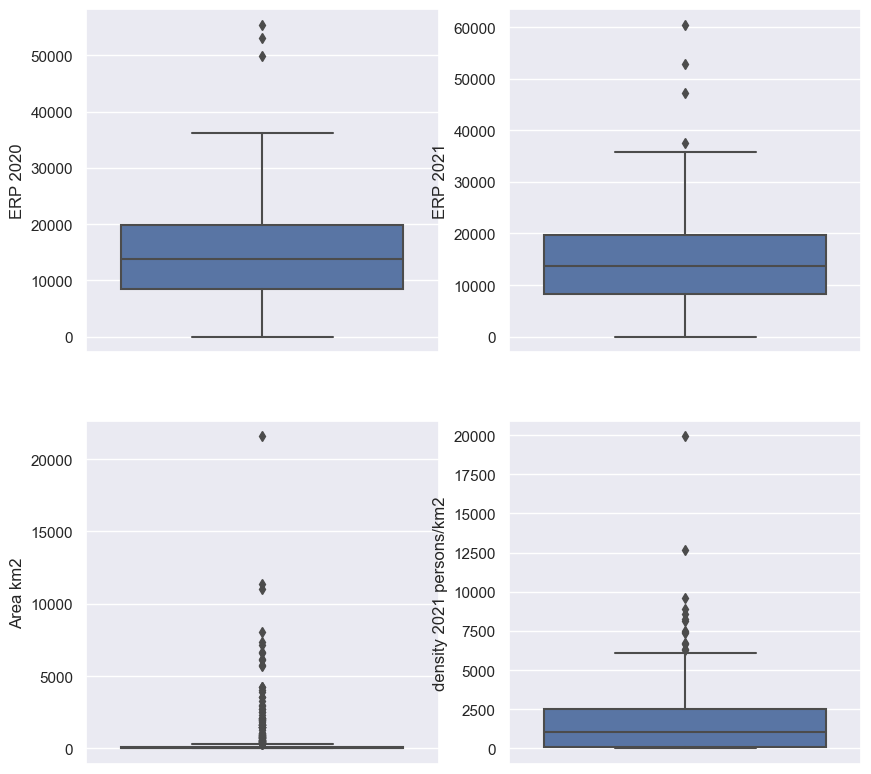

In [40]:
# Box diagram of population
fig=plt.figure(figsize=(10,10),dpi=100)
fig.add_subplot(2,2,1)
sns.boxplot(y=population1['ERP 2020'])

fig.add_subplot(2,2,2)
sns.boxplot(y=population1['ERP 2021'])

fig.add_subplot(2,2,3)
sns.boxplot(y=population1['Area km2'])

fig.add_subplot(2,2,4)
sns.boxplot(y=population1['density 2021 persons/km2'])